In [75]:
import sys
sys.path.append('..')
from pathlib import Path
from utils import *
import train_config as config
from torch.nn import Sequential
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
dataset_name = "../fsoco_segmentation_processed"
dataset_name

'../fsoco_segmentation_processed'

In [45]:
img_mask_pairs = find_mask_img_pairs(dataset_name, "imgs", "masks")
img_mask_pairs[:5]

[(PosixPath('../fsoco_segmentation_processed/imgs/BME_00006.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00006.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00019.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00019.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00028.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00028.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00039.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00039.npz')),
 (PosixPath('../fsoco_segmentation_processed/imgs/BME_00043.npz'),
  PosixPath('../fsoco_segmentation_processed/masks/BME_00043.npz'))]

In [100]:
class_color_jitter = {
    0: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
    1: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
    2: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
    3: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
    4: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
    5: {"hue": (-0.5, 0.5), "saturation": (0.5, 1.5), "brightness": (0.5, 1.5)},
}

T = transforms.Compose(
    [
        ClasswiseColorJitter(class_color_jitter),
        RandomHorizontalFlipWithMask(0.5),
        RandomAffineWithMask(degrees=15, translate=(0.1, 0.1)),
        ResizeWithMask(size=(900, 1500), antialias=True),
        Normalize()
    ])

In [20]:
np.random.seed(config.config["seed"])

In [47]:
np.random.shuffle(img_mask_pairs)

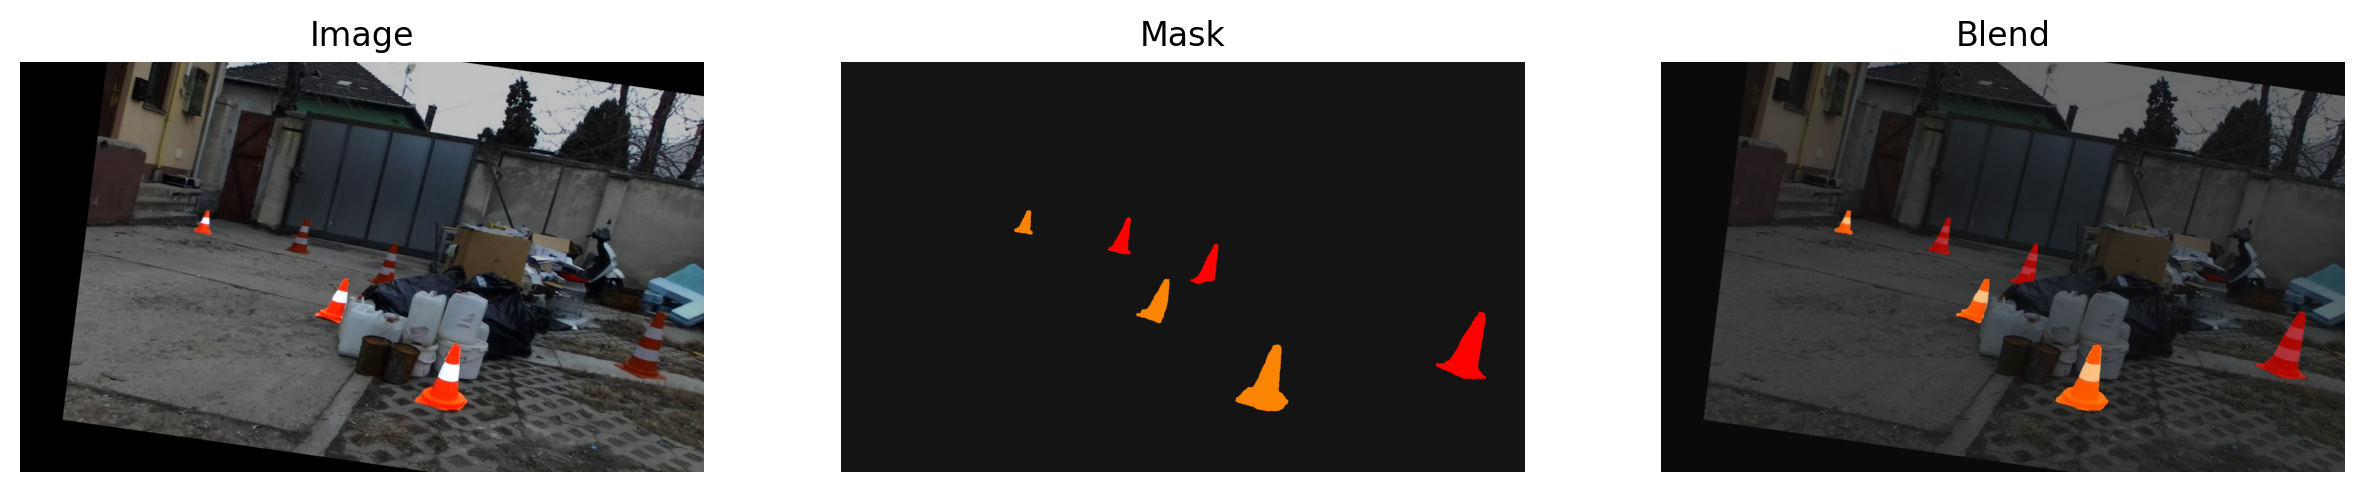

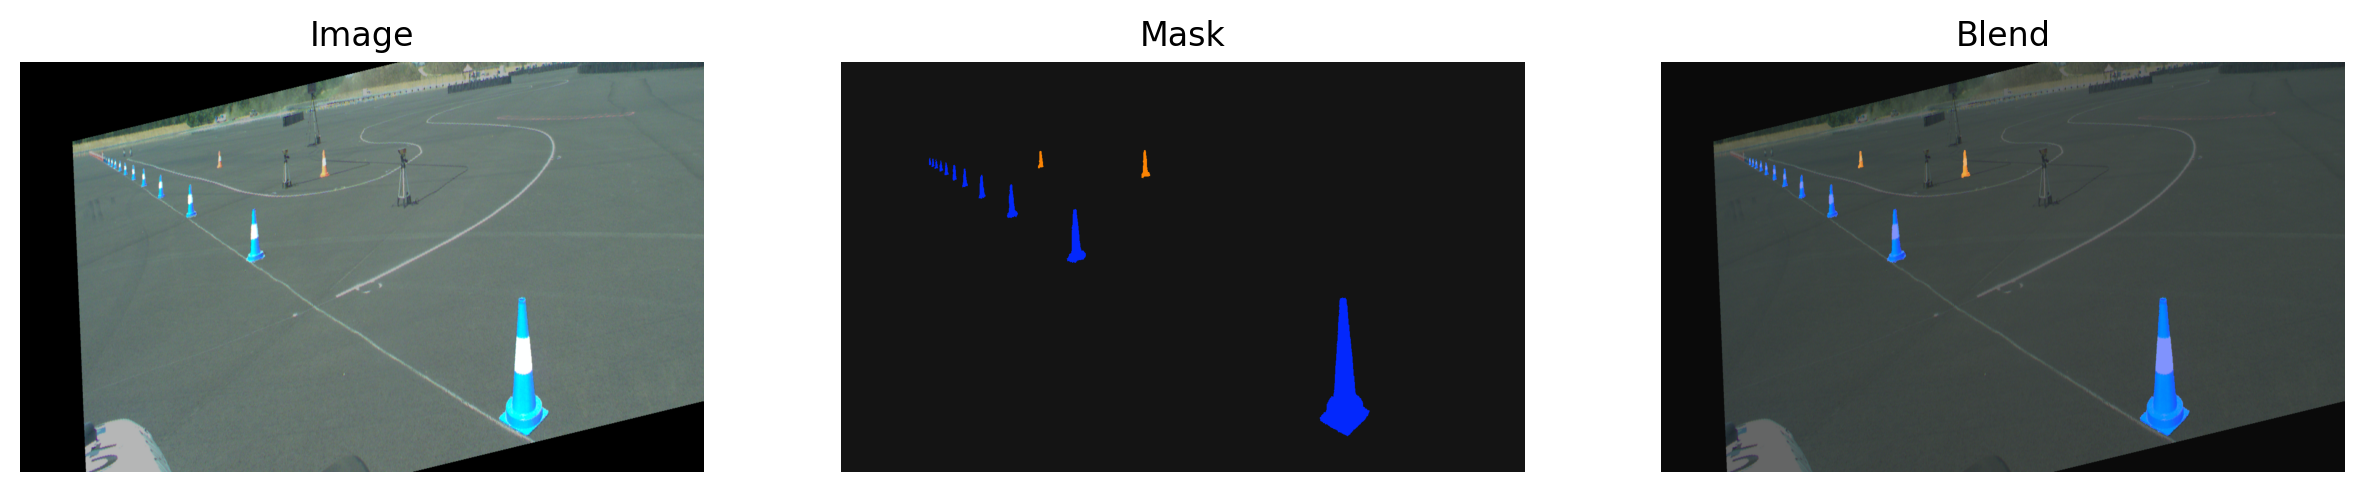

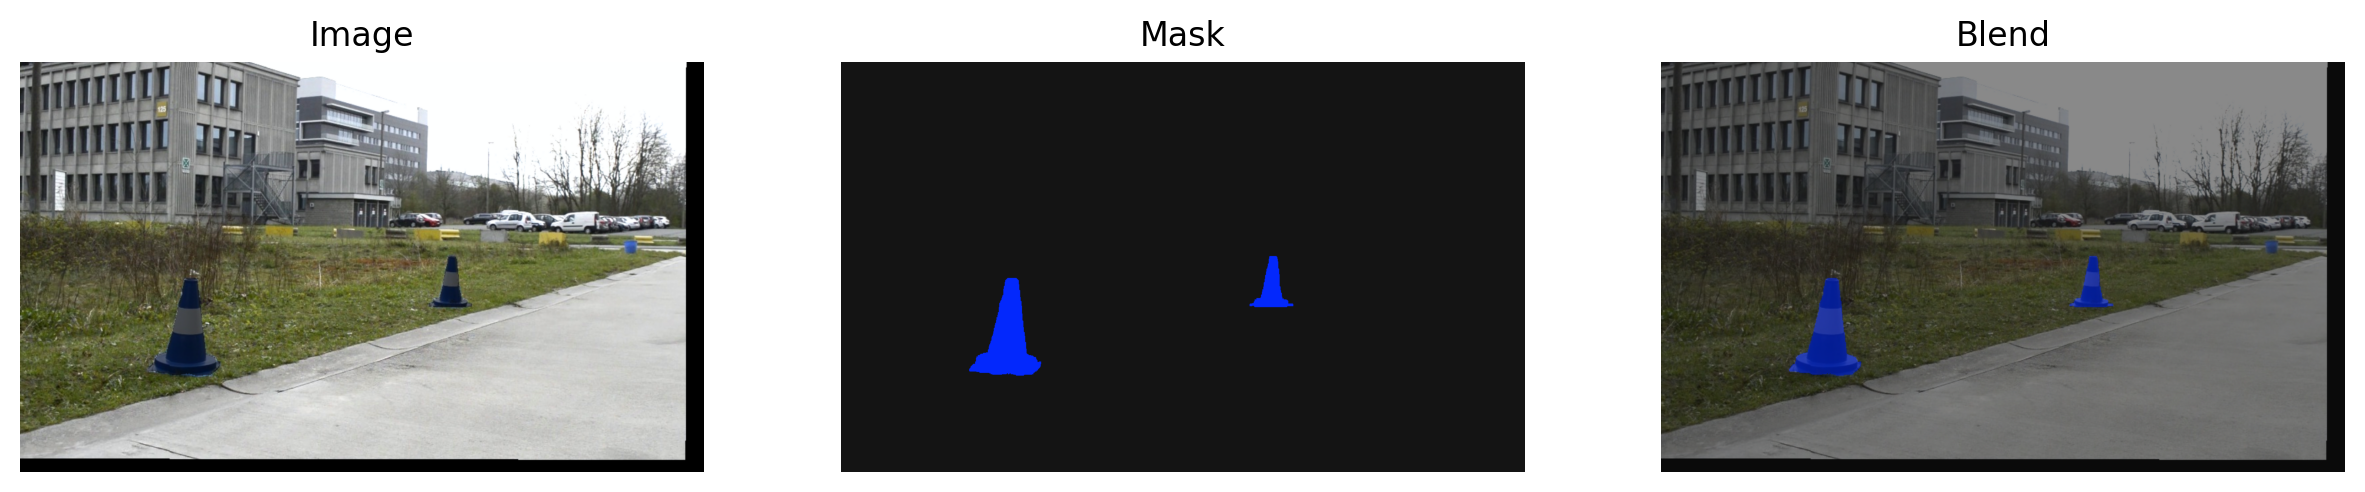

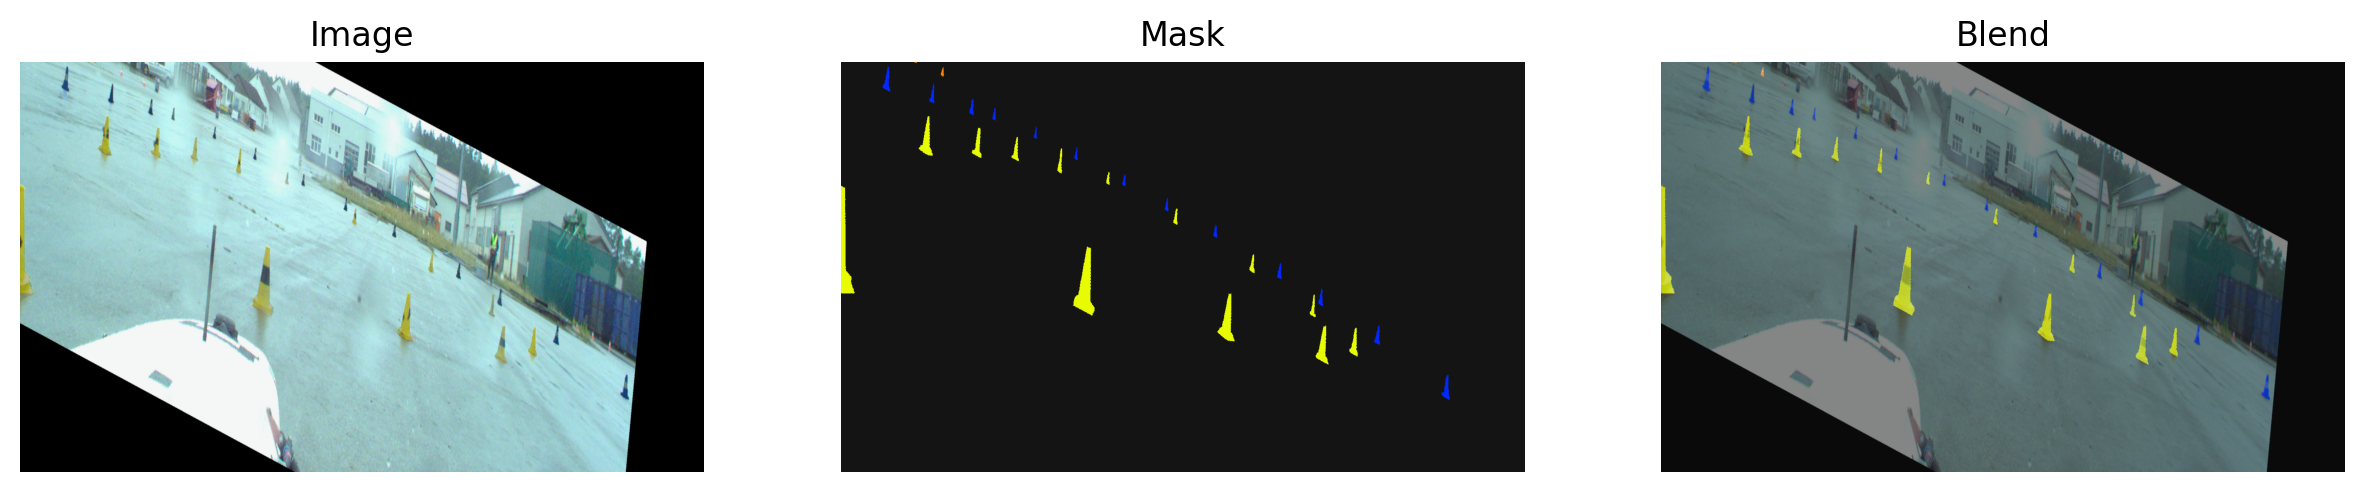

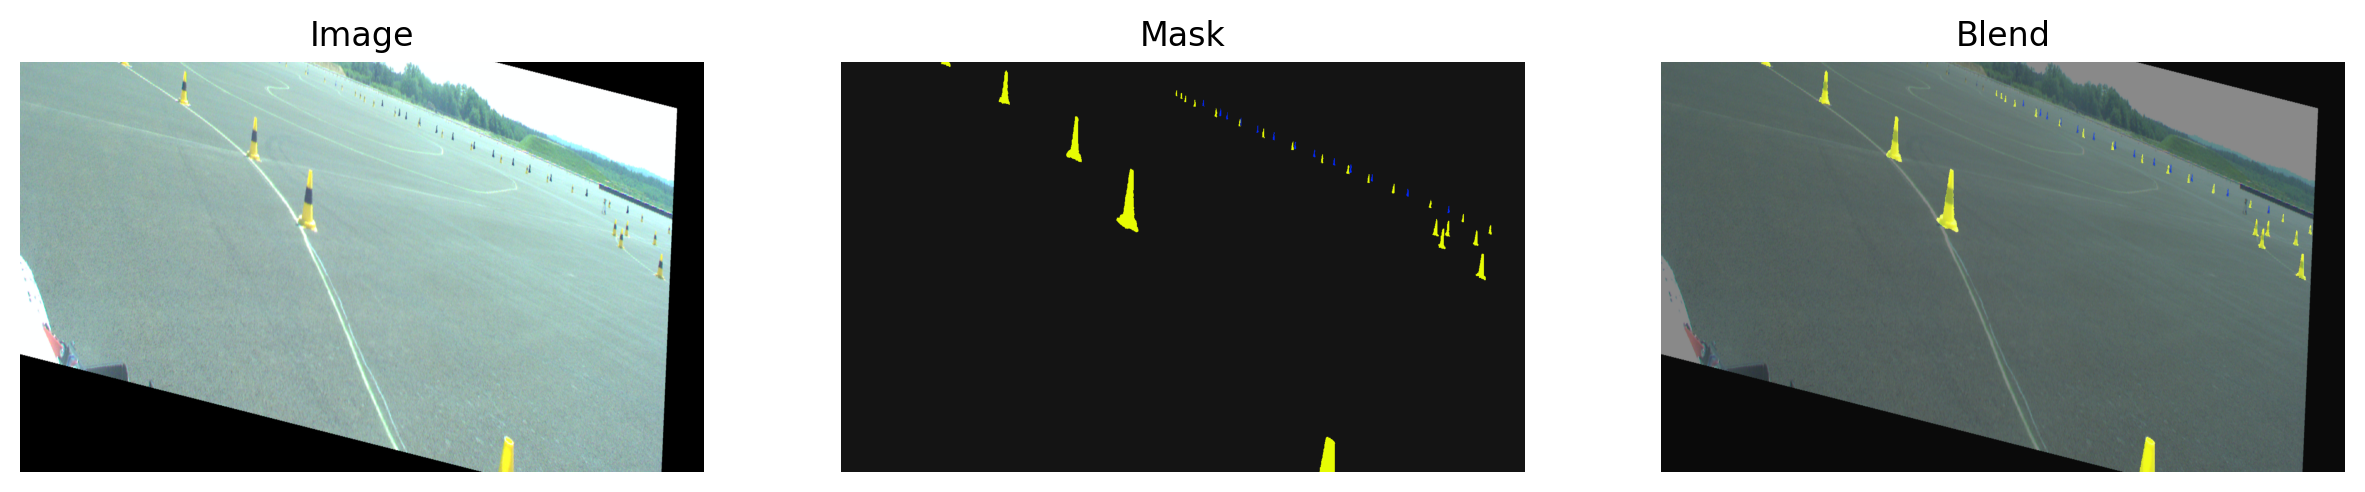

In [101]:
ds = ConeSegmentationDataset(img_mask_pairs, transform=T)
for i in range(5):
    img, mask = ds[i]
    visualize_mask_img_pair_from_tensor(img, mask, denorm=True, blend=True, show=True)